In [2]:
#read data into dataframes
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib import pylab as plt
df1 = pd.read_csv("C:/Users/heypu/OneDrive/Desktop/DATA1030-Fall2022/Flight-Prices/data/Clean_Dataset.csv")
df2 = pd.read_csv("C:/Users/heypu/OneDrive/Desktop/DATA1030-Fall2022/Flight-Prices/data/business.csv")
df3 = pd.read_csv("C:/Users/heypu/OneDrive/Desktop/DATA1030-Fall2022/Flight-Prices/data/economy.csv")

In [3]:
#inspect cleaned data
df1.loc[:,df1.columns != 'price']

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1
...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49


In [4]:
#inspect data collected on business class
df2.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [5]:
#inspect data collected on economy class
df3.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [6]:
#since we only use cleaned data in this project, inspect datatype of df1
print(df1.dtypes) 

Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object


count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64


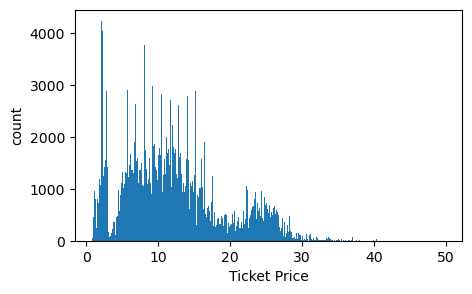

In [7]:
#inspect target varaible
print(df1['price'].describe())
plt.figure(figsize=(5,3))

df1['duration'].plot.hist(bins = int(np.sqrt(df1.shape[0])))             
plt.xlabel('Ticket Price')
plt.ylabel('count')
plt.show()

<AxesSubplot:xlabel='price'>

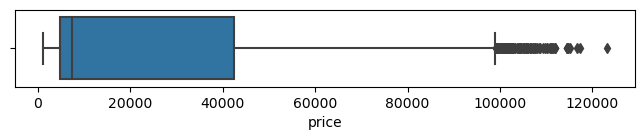

In [9]:
plt.figure(figsize = (8,1))
sns.boxplot(x = 'price', data = df1)

<AxesSubplot:xlabel='price', ylabel='Count'>

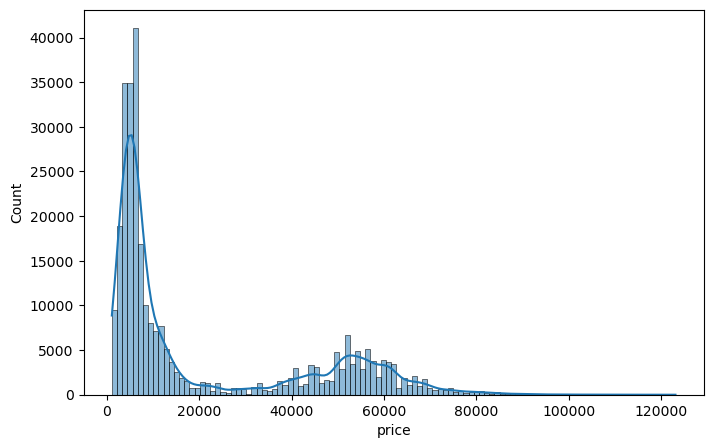

In [8]:
plt.figure(figsize = (8,5))
sns.histplot(x = 'price', data = df1, kde = True)


Text(0.5, 1.0, 'Airlines vs Ticket Price for Economy Class')

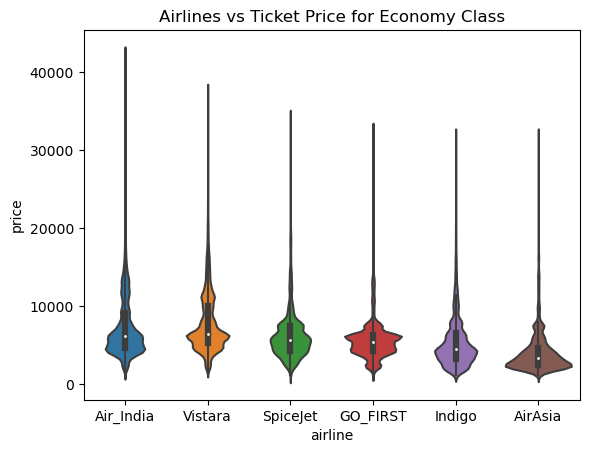

In [10]:
sns.violinplot(y = "price", x = "airline",data = df1.loc[df1["class"]=='Economy'].sort_values("price", ascending = False), kind="boxen")
plt.title("Airlines vs Ticket Price for Economy Class")

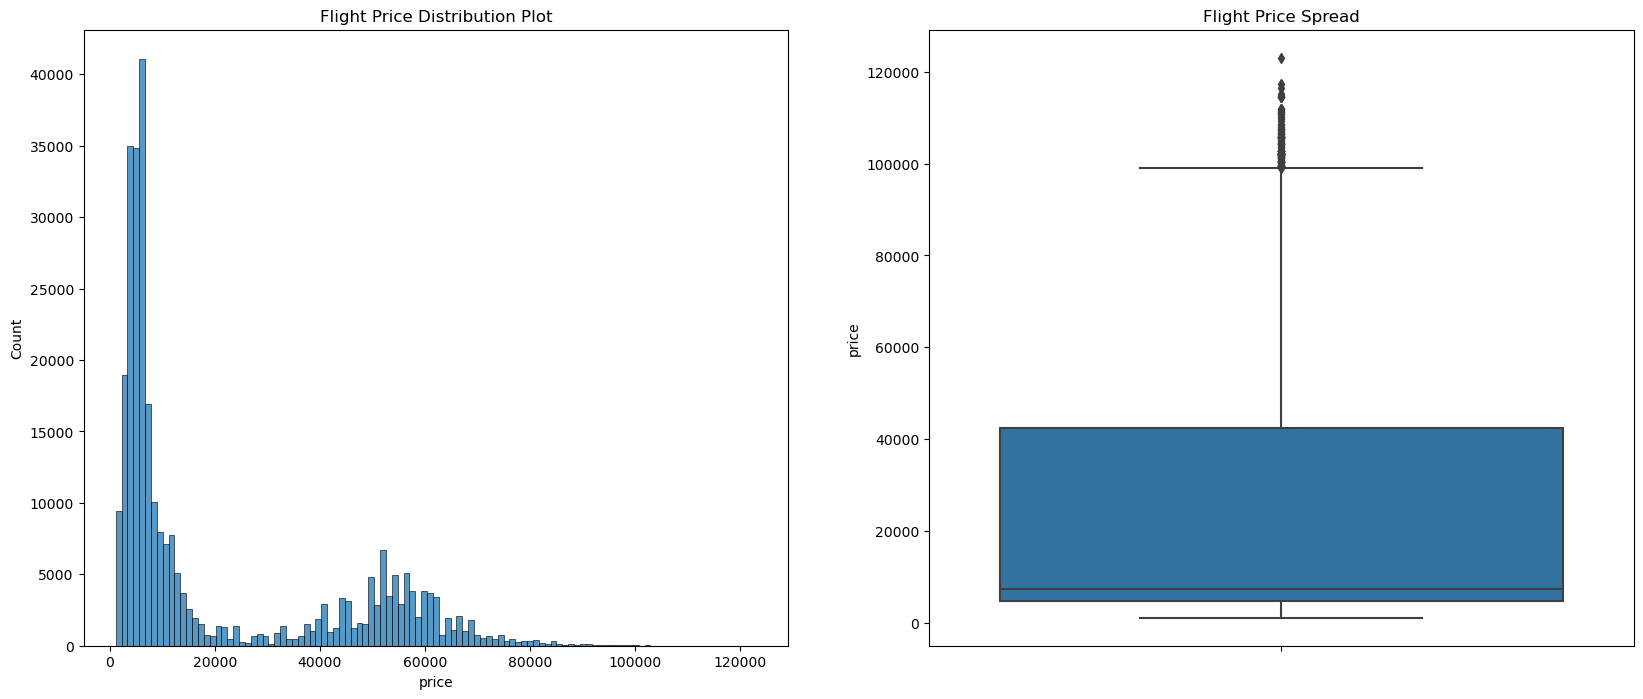

In [22]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Flight Price Distribution Plot')
sns.histplot(df1.price)

plt.subplot(1,2,2)
plt.title('Flight Price Spread')
sns.boxplot(y=df1.price)

plt.show()

Text(0.5, 1.0, 'Airlines vs Ticket Price for Economy Class')

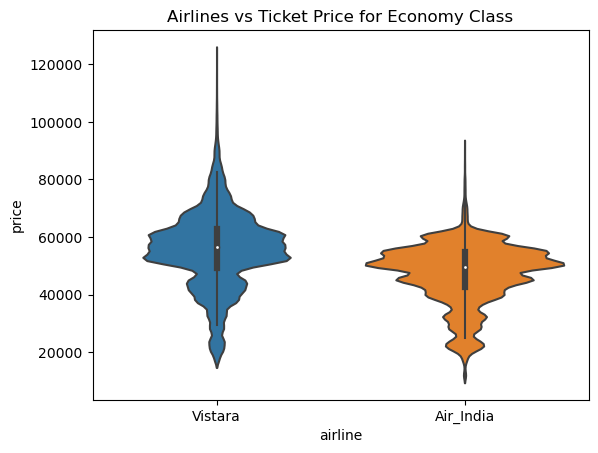

In [11]:
sns.violinplot(y = "price", x = "airline",data = df1.loc[df1["class"]=='Business'].sort_values("price", ascending = False), kind="boxen",)
plt.title("Airlines vs Ticket Price for Economy Class")

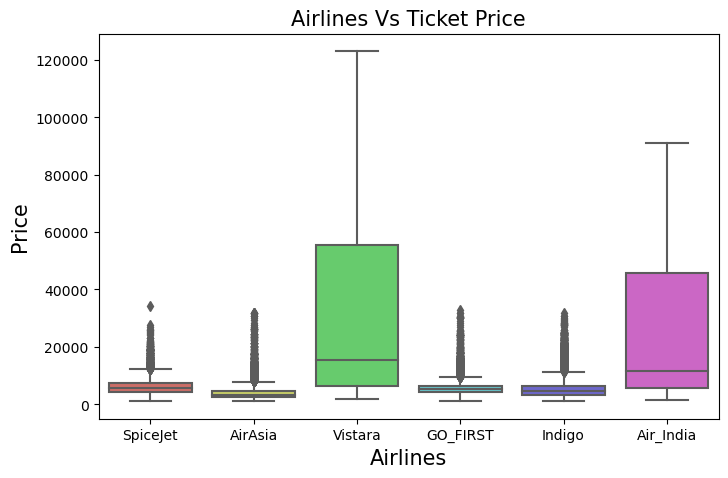

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df1['airline'],y=df1['price'],palette='hls')
plt.title('Airlines Vs Ticket Price',fontsize=15)
plt.xlabel('Airlines',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

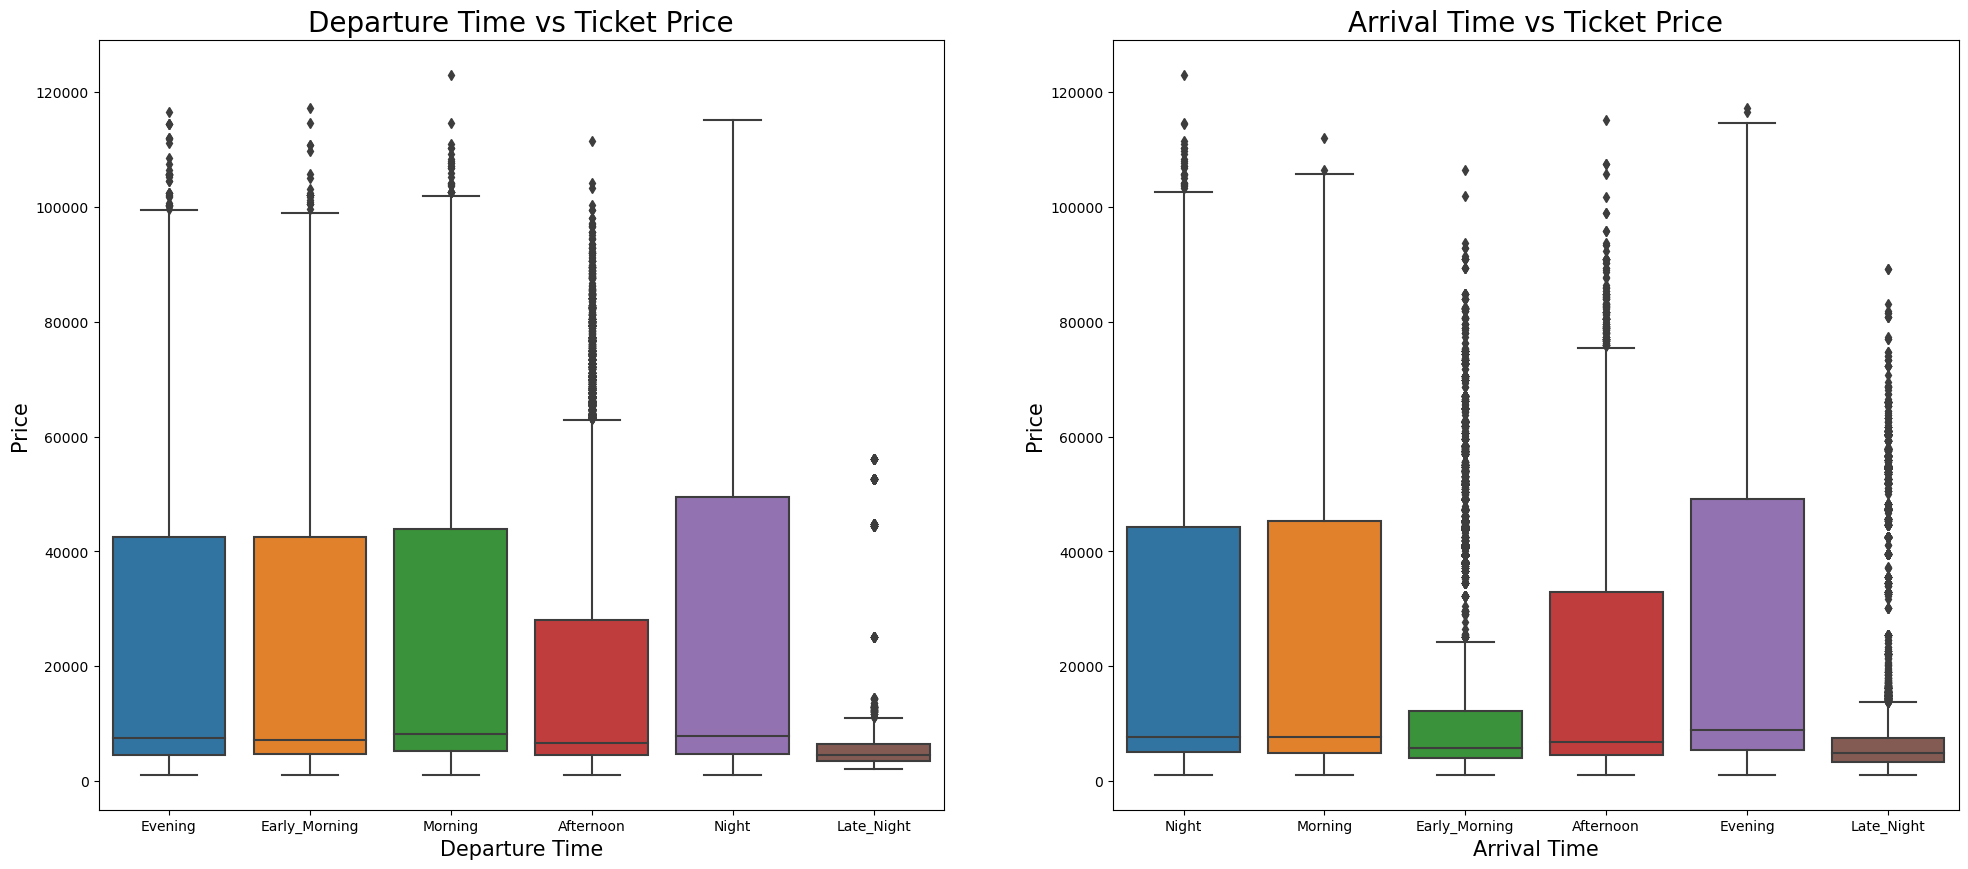

In [13]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df1)
plt.title('Departure Time vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df1)
plt.title('Arrival Time vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

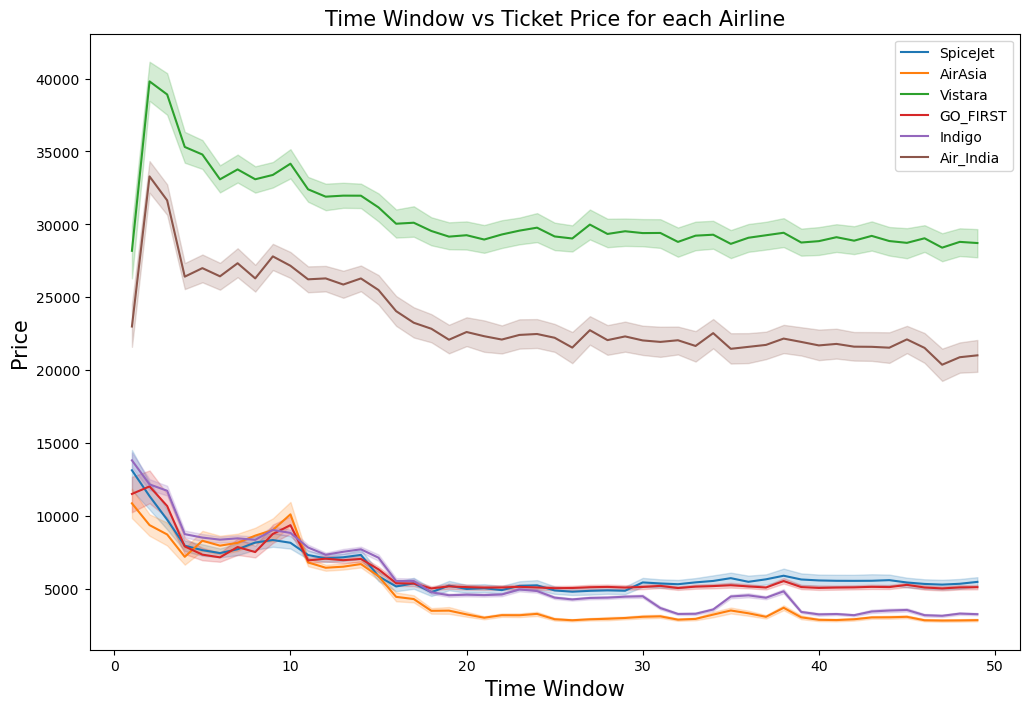

In [14]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df1,x='days_left',y='price',hue='airline')
plt.title('Time Window vs Ticket Price for each Airline',fontsize=15)
plt.legend()
plt.xlabel('Time Window',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

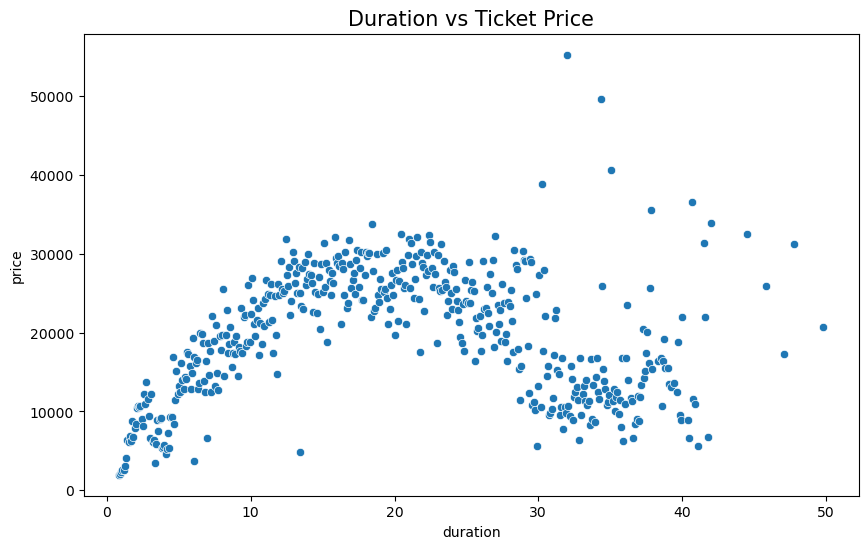

In [15]:
df_temp = df1.groupby(['duration'])['price'].mean().reset_index()

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x="duration", y="price", data=df_temp).set_title("Duration vs Ticket Price",fontsize=15)

In [16]:
#set up splitting function
from sklearn.model_selection import train_test_split 
def basic_split(X,y,train_size,val_size,test_size,random_state):
    
    # test the inputs
    if not train_size + val_size + test_size == 1:
        raise ValueError('The sum of train_size, val_size, test_size is not 1')
    if not type(random_state) == int:
        raise ValueError('random_state is not an integar')

    # perform basic split
    X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = train_size,random_state = random_state)
    X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = val_size/(1-train_size),\
                                                    random_state = random_state)
    
    # test the outputs
    expectation = {X_train.shape[0]:train_size, y_train.shape[0]:train_size, X_val.shape[0]:val_size,\
                   y_val.shape[0]:val_size, X_test.shape[0]:test_size, y_test.shape[0]:test_size}
    total_length = X.shape[0]
    for output_length, expected_size in list(expectation.items()):
        if output_length < (expected_size*total_length - 1) or output_length > (expected_size*total_length + 1):
            raise ValueError('Output size is off')
            
    return X_train,y_train,X_val,y_val,X_test,y_test 

#split into 80-10-10  
y = df1['price']
X = df1.loc[:,df1.columns != 'Unnamed: 0']
X = df1.loc[:,df1.columns != 'price']
X_train,y_train,X_val,y_val,X_test,y_test = basic_split(X,y,0.8,0.1,0.1,42)

print("X_train:\n","shape:",X_train.shape)
print("\nX_val:\n","shape:",X_val.shape)
print("\nX_test:\n","shape:",X_test.shape)
print("\ny_train:\n","shape:",y_train.shape)
print("\ny_val:\n","shape:",y_val.shape)
print("\ny_test:\n","shape:",y_test.shape)

X_train:
 shape: (240122, 11)

X_val:
 shape: (30015, 11)

X_test:
 shape: (30016, 11)

y_train:
 shape: (240122,)

y_val:
 shape: (30015,)

y_test:
 shape: (30016,)


In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

onehot_ftrs = ['airline','source_city','departure_time','stops','arrival_time','destination_city','class']
minmax_ftrs = ['duration','days_left']


#Collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

#Do transforming
X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

#Inspect datasets are in right shape after transforming
print(X_train_prep.shape)
print(X_train_prep)

#Make np arrays backinto dataframe
feature_names = preprocessor.get_feature_names_out()
ready_X_train = pd.DataFrame(X_train_prep,columns=feature_names)
ready_X_val = pd.DataFrame(X_val_prep,columns=feature_names)
ready_X_test = pd.DataFrame(X_test_prep,columns=feature_names)

print("\n preprocessed X_train: \n",ready_X_train.shape)
print("\n preprocessed X_val: \n",ready_X_val.shape)
print("\n preprocessed X_test: \n",ready_X_test.shape)

(240122, 37)
[[0.         1.         0.         ... 1.         0.37938776 0.10416667]
 [0.         0.         0.         ... 1.         0.12591837 0.25      ]
 [0.         1.         0.         ... 0.         0.41510204 0.89583333]
 ...
 [0.         1.         0.         ... 1.         0.26204082 0.58333333]
 [0.         0.         1.         ... 1.         0.15306122 0.79166667]
 [0.         1.         0.         ... 1.         0.39469388 0.33333333]]

 preprocessed X_train: 
 (240122, 37)

 preprocessed X_val: 
 (30015, 37)

 preprocessed X_test: 
 (30016, 37)
